In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Overall Top ~4900

In [32]:
df = pd.read_csv('top-info.csv')
percent_workflow = round(df[df['wf_contents'].notnull()].shape[0] / df.shape[0],4) 
percent_scpolicy = round(df[df['security_policy'].notnull()].shape[0] / df.shape[0],4) 
wf_df = df[df['wf_contents'].notnull()]
wf_and_sc = round(wf_df[wf_df['security_policy'].notnull()].shape[0] / df.shape[0],4)
total_wf = 0
for index, row in wf_df.iterrows():
    total_wf += row['wf_contents'].count("'active'")
avg_wfs = round(total_wf / wf_df.shape[0],2)
print(percent_workflow,percent_scpolicy,wf_and_sc,avg_wfs)
print(df.shape[0])

print(df[df['wf_contents'].notnull()].shape[0],df[df['security_policy'].notnull()].shape[0])

0.5059 0.1886 0.1551 4.46
4894
2476 923


In [33]:
print(wf_df.shape[0])
print(df[df['security_policy'].notnull()].shape[0])

2476
923


In [37]:
rand_df = df.sample(3)
with pd.option_context('display.max_colwidth', None):
  display(rand_df)


,author_repo,wf_contents,security_policy
1403,google/brotli,Build/Test' 'active' '12377915' 'Build/Test Ubuntu' 'active' '12366285' 'CIFuzz' 'active' '805873' 'Release build / deploy' 'active' '44493730,To report a security issue please use httpsgcovulnz We use gcovulnz' 'for our intake and do coordination and disclosure here on GitHub including' 'using GitHub Security Advisory The Google Security Team will respond within ' 'working days of your report on gcovulnz
4715,tc39/proposal-pattern-matching,Deploy spec' 'active' '8304844' 'pages-build-deployment' 'active' '17905816,NaN
3627,tabulapdf/tabula,NaN,NaN


# GitHub topics (using top 1000)

In [6]:
topic_df1 = pd.DataFrame(columns=['topic','percent_wf','percent_sp','avg_wfs','percent_wf_and_sp'])
overall_wfs = 0
overall_scs = 0
overall_both = 0
overall_repos = 0
for file in os.listdir('1000-output'):
    if file.endswith(".csv"):
        df = pd.read_csv('./1000-output/' + file)
        percent_workflow = round(df[df['wf_contents'].notnull()].shape[0] / df.shape[0],4) 
        percent_scpolicy = round(df[df['security_policy'].notnull()].shape[0] / df.shape[0],4) 
        wf_df = df[df['wf_contents'].notnull()]
        wf_and_sc = round(wf_df[wf_df['security_policy'].notnull()].shape[0] / df.shape[0],4)
        total_wf = 0
        for index, row in wf_df.iterrows():
            total_wf += row['wf_contents'].count("'active'")
        avg_wfs = round(total_wf / wf_df.shape[0],2)
        topic_df1.loc[len(topic_df1.index)] = [file.removesuffix('-info.csv'),percent_workflow,percent_scpolicy,avg_wfs,wf_and_sc]
        overall_wfs += wf_df.shape[0]
        overall_scs += df[df['security_policy'].notnull()].shape[0]
        overall_both += wf_df[wf_df['security_policy'].notnull()].shape[0]
        overall_repos += df.shape[0]

In [7]:
topic_df1

,topic,percent_wf,percent_sp,avg_wfs,percent_wf_and_sp
0,Monitoring,0.4680,0.1170,3.80,0.0860
1,Firefox,0.2720,0.0380,2.58,0.0240
2,DotNET,0.5240,0.1230,3.45,0.0930
3,P2P,0.3280,0.0550,3.28,0.0440
4,Dependency-management,0.4079,0.0658,1.77,0.0658
...,...,...,...,...,...
175,Laravel,0.5440,0.1470,2.69,0.1260
176,WordPress,0.3470,0.0880,3.70,0.0630
177,JavaScript,0.6230,0.2120,4.79,0.1960
178,Elixir,0.4410,0.0340,1.95,0.0290


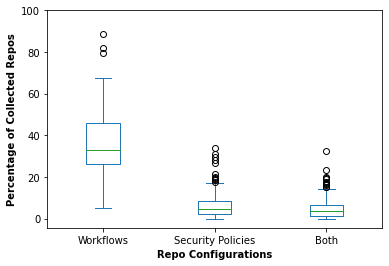

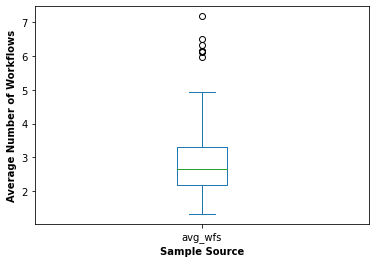

In [8]:
# Plot the dataframe
topic_df1[['percent_wf', 'percent_sp', 'percent_wf_and_sp']].plot(kind='box')
plt.ylabel("Percentage of Collected Repos",fontweight='bold')
plt.yticks([0,0.2,0.4,0.6,0.8,1.0],labels=['0','20','40','60','80','100'])
plt.xticks([1,2,3],labels=['Workflows','Security Policies','Both'])
plt.xlabel("Repo Configurations",fontweight='bold')

# Display the plot
plt.show()

# Plot the dataframe
topic_df1['avg_wfs'].plot(kind='box')
plt.ylabel("Average Number of Workflows",fontweight='bold')
plt.xticks([1])
plt.xlabel('Sample Source',fontweight='bold')

#plt.xticks([1,2,3],labels=['Workflows','Security Policies','Both'])
plt.show()

In [9]:
print(overall_wfs / overall_repos)
print(overall_scs / overall_repos)
print(overall_both / overall_repos)

0.36572505379795744
0.06811237531357373
0.05185409756155556


In [10]:
print(topic_df1['percent_wf'].mean())
print(topic_df1['percent_sp'].mean())
print(topic_df1['percent_wf_and_sp'].mean())
print(topic_df1['avg_wfs'].mean())

0.3550099999999998
0.06518833333333335
0.04955555555555553
2.8722777777777764


In [11]:
print(overall_wfs)
print(overall_scs)
print(overall_repos)

61523
11458
168222


In [12]:
i=168222+4894

In [13]:
print(i)

173116


In [14]:
print((2476 + overall_wfs) / 173116)
print((923 + overall_scs) / 173116)

0.3696885325446521
0.07151851937429238


# GitHub topics (using top 100)

In [15]:
topic_df2 = pd.DataFrame(columns=['topic','percent_wf','percent_sp','avg_wfs','percent_wf_and_sp'])
overall_wfs = 0
overall_scs = 0
overall_both = 0
overall_repos = 0
for file in os.listdir('100-output'):
    if file.endswith(".csv"):
        df = pd.read_csv('./100-output/' + file)
        percent_workflow = round(df[df['wf_contents'].notnull()].shape[0] / df.shape[0],4) 
        percent_scpolicy = round(df[df['security_policy'].notnull()].shape[0] / df.shape[0],4) 
        wf_df = df[df['wf_contents'].notnull()]
        wf_and_sc = round(wf_df[wf_df['security_policy'].notnull()].shape[0] / df.shape[0],4)
        total_wf = 0
        for index, row in wf_df.iterrows():
            total_wf += row['wf_contents'].count("'active'")
        avg_wfs = round(total_wf / wf_df.shape[0],2)
        topic_df2.loc[len(topic_df2.index)] = [file.removesuffix('-info.csv'),percent_workflow,percent_scpolicy,avg_wfs,wf_and_sc]
        overall_wfs += wf_df.shape[0]
        overall_scs += df[df['security_policy'].notnull()].shape[0]
        overall_both += wf_df[wf_df['security_policy'].notnull()].shape[0]
        overall_repos += df.shape[0]

In [16]:
topic_df2

,topic,percent_wf,percent_sp,avg_wfs,percent_wf_and_sp
0,Monitoring,0.67,0.3400,7.61,0.2700
1,Firefox,0.53,0.1300,4.47,0.1200
2,DotNET,0.74,0.2900,4.59,0.2600
3,P2P,0.62,0.2100,4.24,0.1700
4,Dependency-management,0.40,0.0667,1.80,0.0667
...,...,...,...,...,...
175,Laravel,0.75,0.3400,4.16,0.3000
176,WordPress,0.48,0.1900,7.31,0.1700
177,JavaScript,0.81,0.4300,6.47,0.4200
178,Elixir,0.70,0.1000,2.89,0.1000


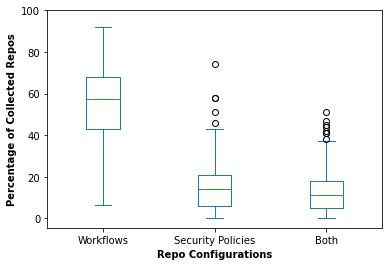

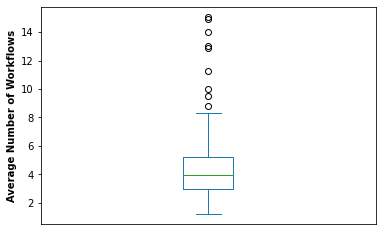

In [17]:
# Plot the dataframe
topic_df2[['percent_wf', 'percent_sp', 'percent_wf_and_sp']].plot(kind='box')
plt.ylabel("Percentage of Collected Repos",fontweight='bold')
plt.yticks([0,0.2,0.4,0.6,0.8,1.0],labels=['0','20','40','60','80','100'])
plt.xticks([1,2,3],labels=['Workflows','Security Policies','Both'])
plt.xlabel("Repo Configurations",fontweight='bold')

# Display the plot
plt.show()

# Plot the dataframe
topic_df2['avg_wfs'].plot(kind='box')
plt.ylabel("Average Number of Workflows",fontweight='bold')
plt.xticks([])
plt.show()

In [18]:
print(overall_wfs / overall_repos)
print(overall_scs / overall_repos)
print(overall_both / overall_repos)

0.5514668760868345
0.1594211028215628
0.13614180737084197


In [19]:
print(topic_df2['percent_wf'].mean())
print(topic_df2['percent_sp'].mean())
print(topic_df2['percent_wf_and_sp'].mean())
print(topic_df2['avg_wfs'].mean())

0.5484583333333332
0.15803611111111102
0.13493777777777782
4.440333333333332


In [20]:
print(overall_wfs)
print(overall_scs)
print(overall_repos)

9831
2842
17827


In [28]:
(9831 + 1170) / (17827 + 4900)


0.4840498085977032

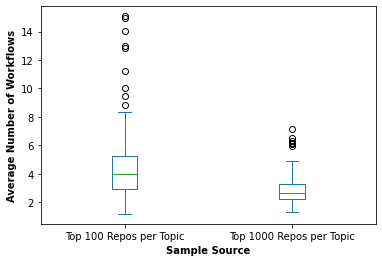

In [23]:
combined_dfs = pd.DataFrame({'Top 100 Repos per Topic': topic_df2['avg_wfs'],
                             'Top 1000 Repos per Topic': topic_df1['avg_wfs']})
combined_dfs.plot(kind='box')
plt.ylabel('Average Number of Workflows',fontweight='bold')
plt.xlabel('Sample Source',fontweight='bold')
plt.show()

In [29]:
print((2476 + overall_wfs) / (17827 + 4900))
print((923 + overall_scs) / (17827 + 4900))

0.5415144981739781
0.16566198794385534
